In [40]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [11]:
boston = pd.read_csv('Boston_house.csv')
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [16]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [17]:
boston.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677082,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


- category = CHAS, RAD

In [57]:
feature_cols = boston.columns.difference(['Target'])
x = boston[feature_cols]
y = boston['Target']


In [58]:
print(x.shape, y.shape)

(506, 13) (506,)


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [60]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = LR.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)

In [62]:
print(mse, rmse, sep='\n')

22.71322800444279
4.765839695630015


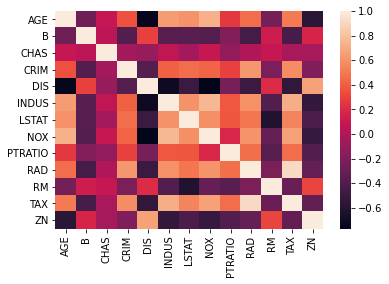

In [31]:
correlation = x.corr()
sns.heatmap(correlation)
plt.show()

In [69]:
feature_cols = boston.columns.difference(['Target'])
x = boston[feature_cols]
y = boston['Target']


In [63]:
x = preprocessing.StandardScaler().fit(x).transform(x)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [65]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [66]:
y_pred = LR.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)

In [67]:
print(mse, rmse, sep='\n')

15.581249610691208
3.947309160769043


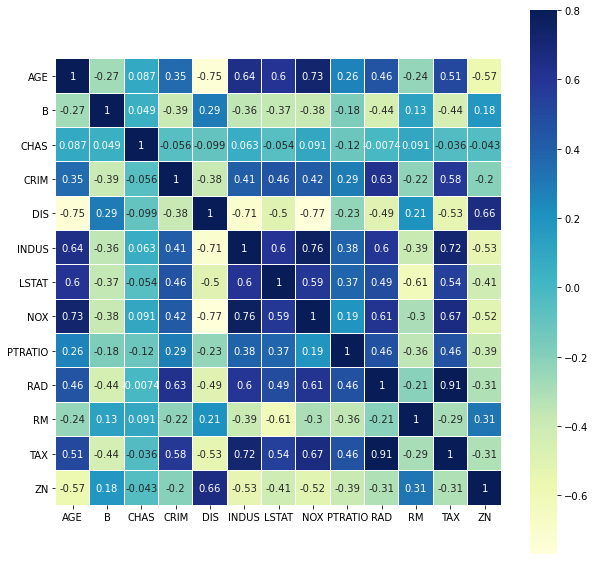

In [81]:
correlation = x.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation,
           vmax = 0.8,
           linewidth = 0.01,
           square = True,
           annot = True,
           cmap = 'YlGnBu')
plt.show()

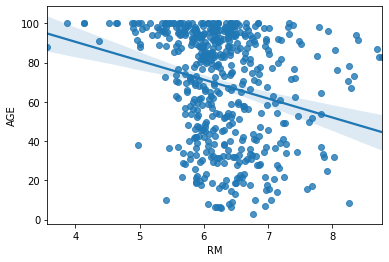

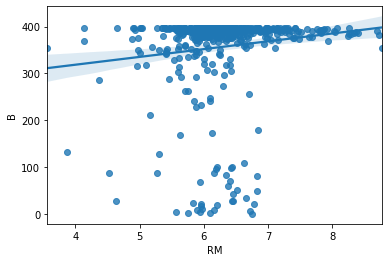

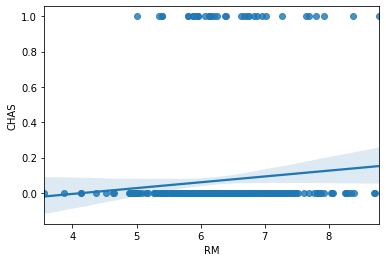

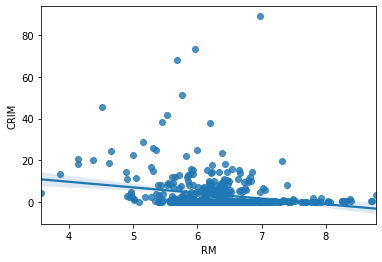

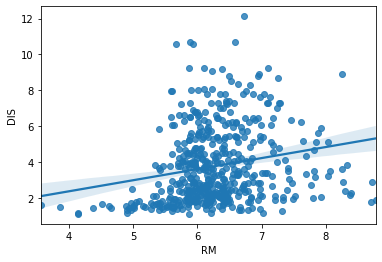

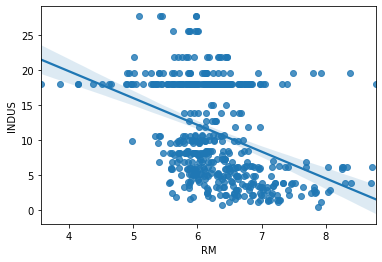

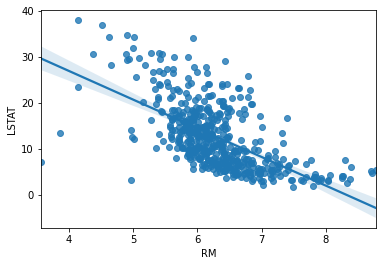

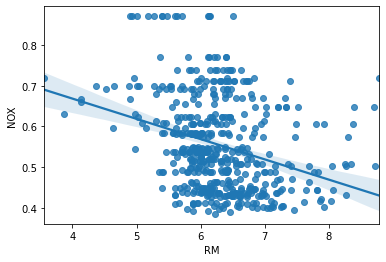

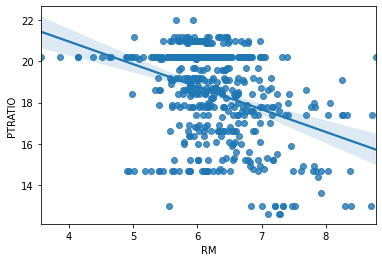

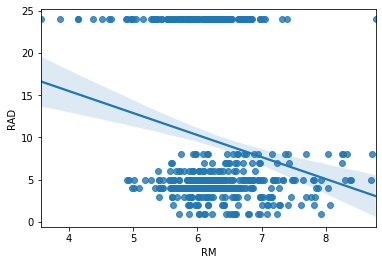

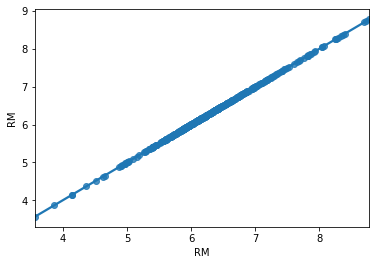

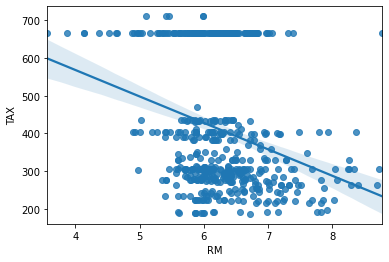

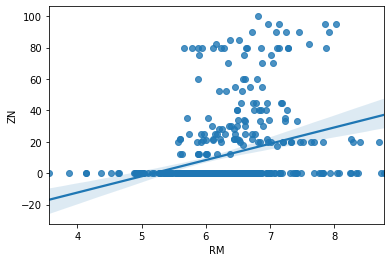

In [91]:
for y in x.columns:
    sns.regplot(data = x, x = 'RM', y = y)
    plt.show()